In [1]:
# Load the 'Employee Productivity and Satisfaction HR Data' dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('hr_dashboard_data.csv')

In [2]:
# Create a palette mapping for the unique positions
positions = df['Position'].unique()
palette = dict(zip(positions, sns.color_palette()))

In [3]:
palette

{'Analyst': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'Manager': (1.0, 0.4980392156862745, 0.054901960784313725),
 'Intern': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 'Team Lead': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'Junior Developer': (0.5803921568627451,
  0.403921568627451,
  0.7411764705882353),
 'Senior Developer': (0.5490196078431373,
  0.33725490196078434,
  0.29411764705882354)}

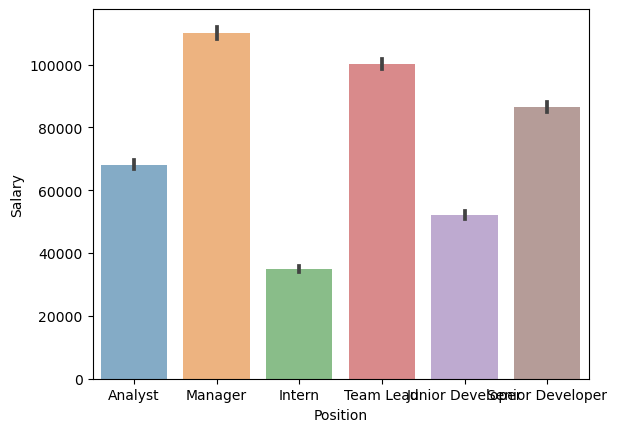

In [4]:
# Bar plot using the same palette
sns.barplot(data=df, x='Position', y='Salary', palette=palette, alpha=0.6)
plt.show()

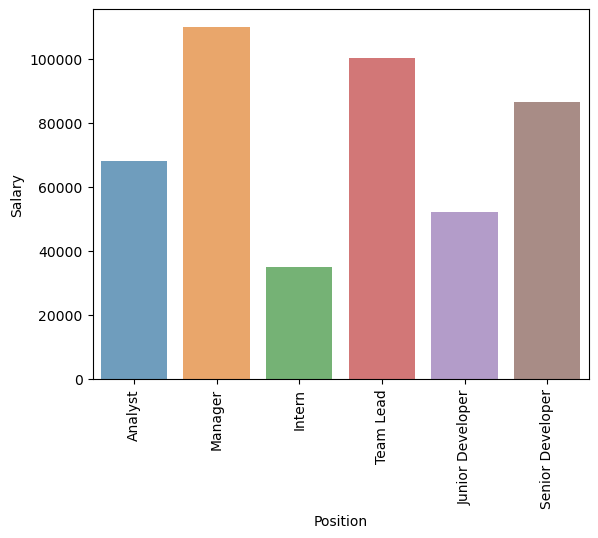

In [5]:
# Bar plot without error bars and with rotated x-ticks
sns.barplot(data=df, x='Position', y='Salary', palette=palette, ci=None, alpha=0.7)
plt.xticks(rotation=90)
plt.show()

In [6]:
order = df.groupby("Position")["Salary"].mean().sort_values(ascending=False).index

In [7]:
order

Index(['Manager', 'Team Lead', 'Senior Developer', 'Analyst',
       'Junior Developer', 'Intern'],
      dtype='object', name='Position')

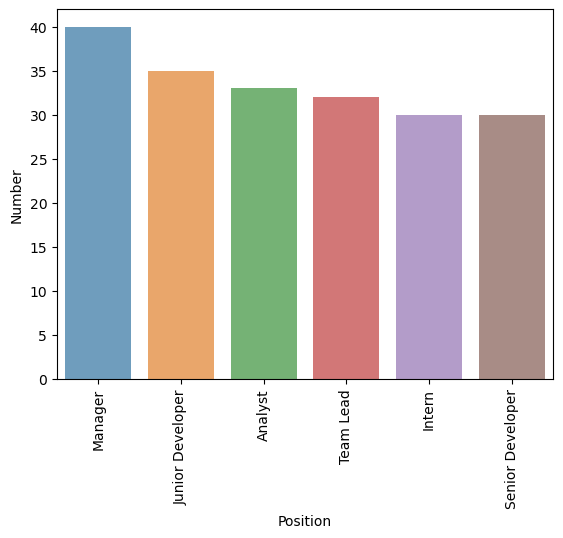

In [17]:
# Bar plot without error bars and with rotated x-ticks
sns.barplot(data=count_Pos, x='Position', y='Number', ci=None, alpha=0.7)
plt.xticks(rotation=90)
plt.show()

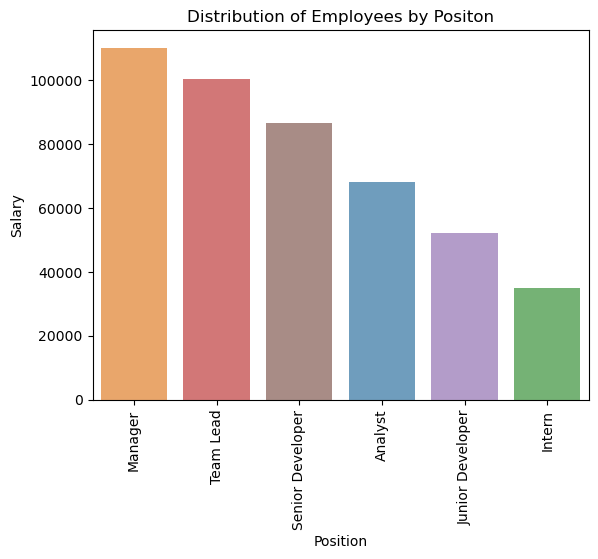

In [15]:
sns.barplot(data=df, x='Position', y='Salary', palette=palette, ci=None, order=order, alpha=0.7)
plt.xticks(rotation=90)
# Add title to the plot
plt.title('Distribution of Employees by Positon')
plt.show()

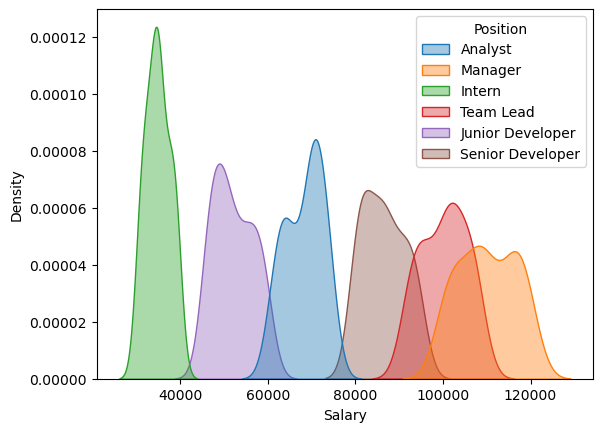

In [9]:
sns.kdeplot(data=df, x='Salary', hue='Position', fill=True, common_norm=False, alpha=0.4)
plt.show()

In [11]:
count_Pos = df['Position'].value_counts().reset_index()
count_Pos.columns=['Position','Number']
count_Pos

,Position,Number
0,Manager,40
1,Junior Developer,35
2,Analyst,33
3,Team Lead,32
4,Intern,30
5,Senior Developer,30


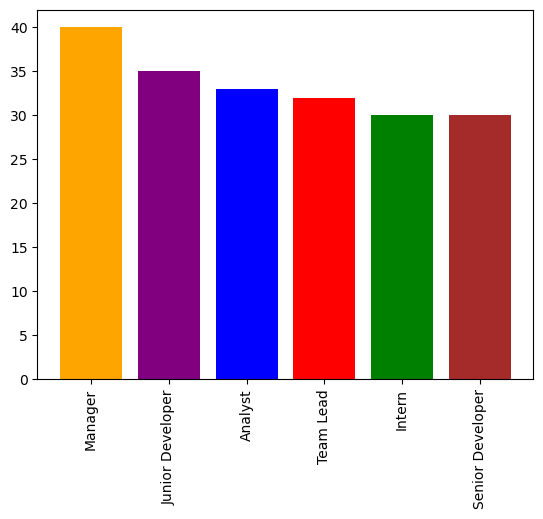

In [13]:
color = ['orange', 'purple', 'blue', 'red', 'green', 'brown']
fig, ax = plt.subplots()
ax.bar(count_Pos['Position'], count_Pos['Number'],
       color=color,
       linewidth=3)
plt.xticks(rotation=90)

# Show graph
plt.show()

Interpretation: The satisfaction scores are widely distributed across the 0–100% range. The histogram shows a relatively uniform spread with slight peaks around the higher end (80-90%) and a modest number of very low satisfaction values. This indicates that employee satisfaction varies greatly, with some employees extremely satisfied and others very dissatisfied. The median satisfaction is about 50%, and the dataset even includes a few employees at 0% satisfaction (completely dissatisfied) and some at 100% satisfaction (fully satisfied). This broad distribution suggests a diverse set of experiences and sentiments among the employees.

Interpretation: The productivity histogram reveals that employee productivity is also widely spread. Many employees cluster in the mid-range (around 40-60%), but there are notable groups at the extremes: a number of employees have very low productivity (including a few at 0%), and a decent group achieve high productivity (80-100%). The spread suggests no single dominant productivity level – performance varies significantly across the workforce. The average productivity is about 47%, and similar to satisfaction, a handful of employees score at the absolute extremes (0% and near 100%). This variability might hint at differences in roles, capabilities, or motivation across employees.

Interpretation: Job satisfaction varies by department. HR and IT departments show higher median satisfaction (58%) (upper-50%s) compared to Marketing, which has the lowest median satisfaction (37.5%). Sales and Finance are in between (medians roughly in the high 40s). HR in particular not only has a high median satisfaction but also a relatively high upper range (many HR employees report satisfaction above 60%). This aligns with the idea that HR employees tend to be more satisfied on average – one analysis noted HR had the highest average satisfaction among departments. In contrast, Marketing staff often report lower satisfaction, which could point to job stress or unmet expectations in that department. These departmental satisfaction differences are important, as they could relate to turnover rates or morale; managers may need to pay extra attention to departments like Marketing where satisfaction is lagging.

In [14]:
# Bar Chart: Average Productivity by Salary Range
sal_prod_mean = df.groupby('Salary Range')['Productivity (%)'].mean()
sal_prod_std = df.groupby('Salary Range')['Productivity (%)'].std()

plt.figure(figsize=(6,4))
sns.barplot(x=sal_prod_mean.index, y=sal_prod_mean.values, yerr=sal_prod_std.values, palette='viridis')
plt.title('Average Productivity by Salary Range')
plt.xlabel('Salary Range')
plt.ylabel('Average Productivity (%)')
plt.show()

KeyError: 'Salary Range'